In [13]:
from ezfit import FitPDF, Contribution, Ezrestraint
from rsc import MPDF_Wrapper, AttrDict, r_gr_mgr, get_Tb1
import numpy as np
import matplotlib.pyplot as plt 

k13, a1, a2, a3, a4 = get_Tb1() # kvec and basis vectors for Tb1 which are the same for Tb2 and Tb3

Tb3Ni = Contribution(cif_name="Tb3Ni", cf_name="bulkCF", formula="Tb3Ni")
fit = FitPDF(f"./data/Tb3Ni@58K.gr", [Tb3Ni])


mfit = MPDF_Wrapper(fit.cif_files["Tb3Ni"], AttrDict(fit.config))

mfit.add_magnetic_species(
    name="aTb3_1",
    ffparamkey="Tb3",
    strucIdxs=[0, 1, 2, 3],
    basisvecs=np.array([a1, a2, a3, a4]).reshape(4*12, 3),
    kvecs=[k13],
)

mfit.add_magnetic_species(
    name="aTb3_2",
    ffparamkey="Tb3",
    strucIdxs=[4, 5, 6, 7],
    basisvecs=np.array([a1, a2, a3, a4]).reshape(4*12, 3),
    kvecs=[k13],
)

mfit.add_magnetic_species(
    name="aTb3_2",
    ffparamkey="Tb3",
    strucIdxs=[8, 9, 10, 11],
    basisvecs=np.array([a1, a2, a3, a4]).reshape(4*12, 3),
    kvecs=[k13],
)


mfit.set_up_MagCalc()
fit.update_recipe()
mfit.register_mPDF_in_Structure(fit)
fit.LoadResFromFile("structural.res")


fit.run_fit()

0.9994555728623729
Imaginary parts have been discarded.
0.9977197547964908
Imaginary parts have been discarded.
0.9994555728623729 Tb3Ni_scale, Tb3Ni_a, Tb3Ni_b, Tb3Ni_c
Imaginary parts have been discarded.
0.9977197547964908
Imaginary parts have been discarded.
0.9994555728623729
Imaginary parts have been discarded.
0.9977197547964908
Imaginary parts have been discarded.
0.9994555728623729
Imaginary parts have been discarded.
0.9977197547964908
Imaginary parts have been discarded.
0.9994555728623729
Imaginary parts have been discarded.
0.9977197547964908
Imaginary parts have been discarded.
0.9994555728623729 Tb3Ni_scale, Tb3Ni_delta2, Tb3Ni_a, Tb3Ni_b, Tb3Ni_c, Tb3Ni_Tb1_Biso, Tb3Ni_Tb2_Biso, Tb3Ni_Ni1_Biso
Imaginary parts have been discarded.
0.9977197547964908
Imaginary parts have been discarded.
0.9994555728623729
Imaginary parts have been discarded.
0.9977197547964908
Imaginary parts have been discarded.
0.9994555728623729
Imaginary parts have been discarded.
0.9977197547964908
I

/Users/benjaminfahl/miniconda3/envs/py37/lib/python3.7/site-packages/diffpy.srfit-3.0.0-py3.7.egg/diffpy/srfit/fitbase/fitresults.py:174: RuntimeWarning: divide by zero encountered in true_divide
  self.cov = numpy.dot(vh.T.conj()/s**2,vh)
/Users/benjaminfahl/miniconda3/envs/py37/lib/python3.7/site-packages/diffpy.srfit-3.0.0-py3.7.egg/diffpy/srfit/fitbase/fitresults.py:174: RuntimeWarning: invalid value encountered in true_divide
  self.cov = numpy.dot(vh.T.conj()/s**2,vh)


0.9994555728623729
Imaginary parts have been discarded.
0.9977197547964908
Imaginary parts have been discarded.


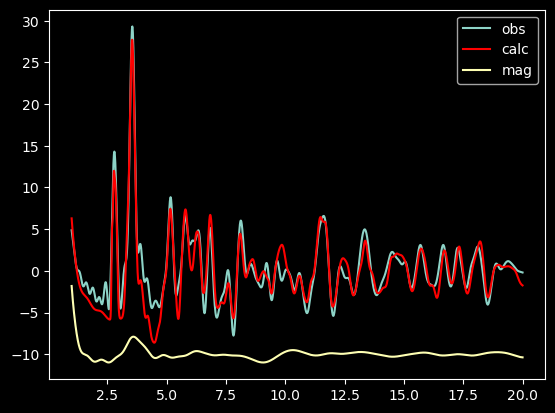

In [14]:
r, gobs, gcalc, magcalc, baseline, gdiff = r_gr_mgr(fit, mfit)

plt.plot(r, gobs, label="obs")
plt.plot(r, gcalc, label="calc", color="red")
plt.plot(r, magcalc - 10, label="mag")

plt.legend()

plt.savefig("mPDF_v1.pdf")

In [15]:
fit.res.printResults()

Some quantities invalid due to missing profile uncertainty
Overall (Chi2 and Reduced Chi2 invalid)
------------------------------------------------------------------------------
Residual       4782.55568199
Contributions  4782.55548091
Restraints     0.00020107
Chi2           4782.55548091
Reduced Chi2   2.52244487
Rw             0.38624601

Variables (Uncertainties invalid)
------------------------------------------------------------------------------
Tb3Ni_Ni1_Biso  3.22929394e-01 +/- nan
Tb3Ni_Tb1_Biso  6.69895550e-01 +/- nan
Tb3Ni_Tb2_Biso  1.53914771e-01 +/- nan
Tb3Ni_a         5.93271958e+00 +/- nan
Tb3Ni_b         9.54656596e+00 +/- nan
Tb3Ni_c         6.35745658e+00 +/- nan
Tb3Ni_delta2    7.01409127e+00 +/- nan
Tb3Ni_scale     6.28118307e+00 +/- inf
ordscale        1.81657762e-01 +/- nan
parascale       1.35383420e+00 +/- nan
xi              1.72459056e+01 +/- nan

Fixed Variables
------------------------------------------------------------------------------
Tb3Ni_Ni1_occ  1.0